Skills & Tools:
Python: Pandas, NumPy

Visualization: Matplotlib, Seaborn

Excel: Pivot Tables, Charts

Notebook: Jupyter

1.Pandas: handling CSV files and doing things like filtering, grouping, and summarizing.

2.NumPy: fast mathematical operations,especially with numbers and arrays 

3. Matplotlib:
Used to create basic charts like bar graphs, line charts, and pie charts.

🔹 Seaborn:
Built on top of Matplotlib, it makes better-looking charts with just a few lines of code. Great for visualizing patterns and relationships in data.

Pivot Tables:
A feature in Excel that lets you quickly group and summarize data. For example, total sales by product or by region.

🔹 Charts:
Used to visualize data in Excel, like line charts or bar graphs — especially useful for reports.

    

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Optional: to make plots look nicer in Jupyter
sns.set(style="whitegrid")
%matplotlib inline

In [9]:
#load and inspect data
# Load dataset
df = pd.read_csv("C:/Users/ashwa/Downloads/retail_sales_dataset.csv")

# First few rows
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,24-11-2023,CUST001,Male,34,Beauty,3,50,150
1,2,27-02-2023,CUST002,Female,26,Clothing,2,500,1000
2,3,13-01-2023,CUST003,Male,50,Electronics,1,30,30
3,4,21-05-2023,CUST004,Male,37,Clothing,1,500,500
4,5,06-05-2023,CUST005,Male,30,Beauty,2,50,100


In [11]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [12]:
# Check for missing values
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

# data cleaning

In [13]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\ashwa\AppData\Local\Temp\ipykernel_7120\2209578340.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [14]:
# Handle missing values (example: fill NA in Quantity)
df['Quantity'] = df['Quantity'].fillna(0)

In [15]:
# Drop duplicates
df = df.drop_duplicates()

In [16]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-06-05,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-05-12,CUST999,Female,36,Electronics,3,50,150


# 4. Feature Engineering

In [18]:
# Add new columns
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Revenue'] = df['Quantity'] * df['Price per Unit']

# 5. Exploratory Data Analysis (EDA)

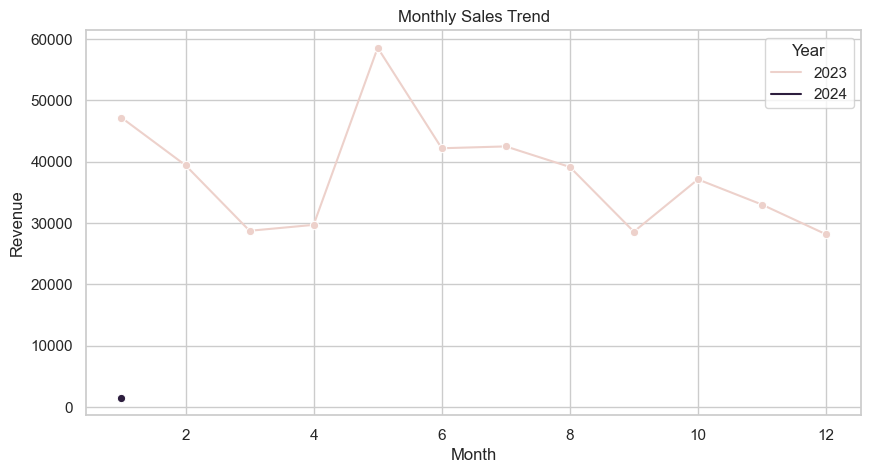

In [20]:
#a. Monthly Sales Trend
monthly_sales = df.groupby(['Year', 'Month'])['Revenue'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(x='Month', y='Revenue', hue='Year', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

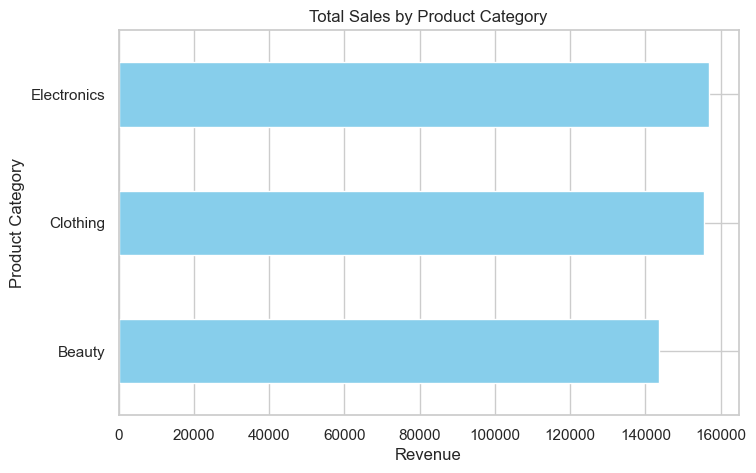

In [23]:
# b. Sales by Product Category
region_sales = df.groupby('Product Category')['Revenue'].sum().sort_values()
region_sales.plot(kind='barh', figsize=(8,5), color='skyblue')
plt.title('Total Sales by Product Category')
plt.xlabel('Revenue')
plt.show()


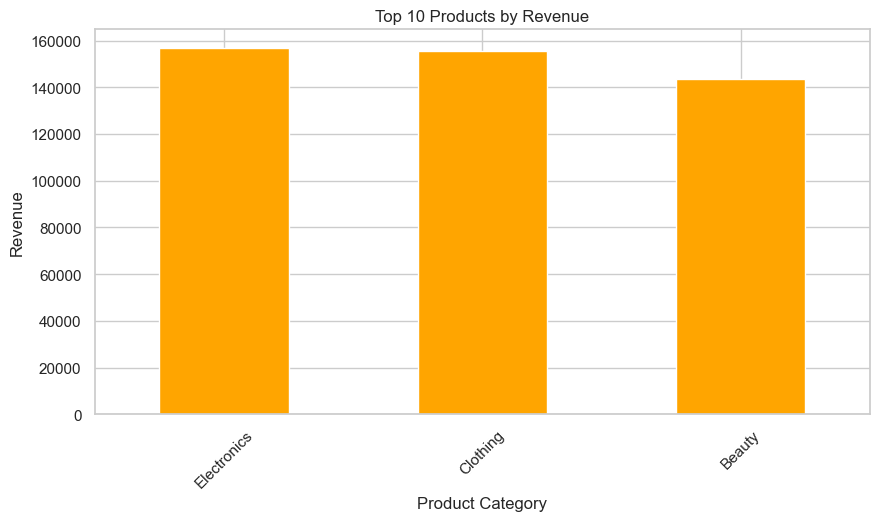

In [25]:
#c. Top 10 Products by Revenue
top_products = df.groupby('Product Category')['Revenue'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', figsize=(10,5), color='orange')
plt.title('Top 10 Products by Revenue')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

In [27]:
df.to_excel('cleaned_retail_data.xlsx', index=False)
